In [2]:
# MNIST 1
import tensorflow

(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

# 3D-Tenosr mit 60000 Samples, jeweilige Größe von 28x28 Pixel
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

import pandas as pd

## Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(784,)))
model.add(layers.Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

# x_train Reshapen
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# y_train reshapen, damit verglichen werden kann
# z.B.: [ 5 ]           -> shape: (1,)
#       [ 0000010000 ]  -> shape: (10,)

# https://keras.io/api/utils/python_utils/#to_categorical-function
# Erstellt uns in Abhängigkeit von 'num_classes' (= Anzahl der Klassen, die es im Dataset gibt => siehe alle unique 
# Antworten in y_train) einen Vektor, bei welchem jede Stelle '1' ist, die die gewünscht Ziffer (0, 1, 2, ...) repräsentiert.

from tensorflow.keras import utils
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)


model_history = model.fit(x_train, y_train, epochs=32, batch_size=32, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/32
1875/1875 [==============================] - 11s 5ms/step - loss: 2.3780 - accuracy: 0.8322 - val_loss: 0.6308 - val_accuracy: 0.8881
Epoch 2/32
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5421 - accuracy: 0.9136 - val_loss: 0.5329 - val_accuracy: 0.9247
Epoch 3/32
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4499 - accuracy: 0.9281 - val_loss: 0.4536 - val_accuracy: 0.9254
Epoch 4/32
18

In [3]:
acc = model_history.history["accuracy"]
acc

[0.8322333097457886,
 0.9135833382606506,
 0.9280833601951599,
 0.9363833069801331,
 0.9408666491508484,
 0.9447833299636841,
 0.9491999745368958,
 0.9509666562080383,
 0.9527166485786438,
 0.9553999900817871,
 0.9574499726295471,
 0.9595000147819519,
 0.9594833254814148,
 0.9613666534423828,
 0.9634000062942505,
 0.9629499912261963,
 0.9651333093643188,
 0.965666651725769,
 0.9661499857902527,
 0.9671666622161865,
 0.9681833386421204,
 0.9688833355903625,
 0.9706500172615051,
 0.9701333045959473,
 0.9705833196640015,
 0.9728166460990906,
 0.9716166853904724,
 0.9725666642189026,
 0.9731000065803528,
 0.973716676235199,
 0.9743166565895081,
 0.9744666814804077]

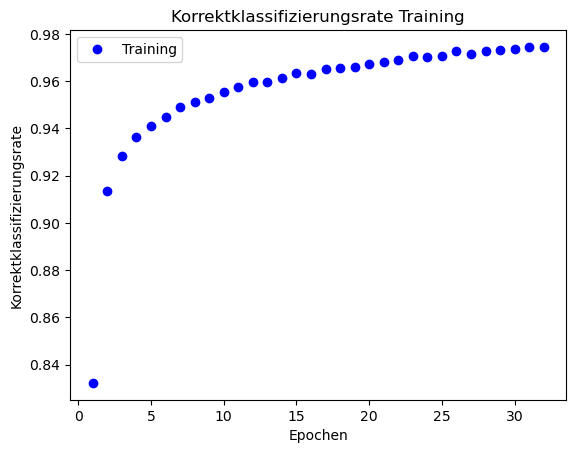

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(1, len(acc) + 1), acc, 'bo', label="Training")
plt.title("Korrektklassifizierungsrate Training")
plt.xlabel("Epochen")
plt.ylabel("Korrektklassifizierungsrate")
plt.legend()
plt.show() 

In [4]:
loss = model_history.history["loss"]
loss

[2.1942458152770996,
 0.539505124092102,
 0.4599764943122864,
 0.41662952303886414,
 0.3807363510131836,
 0.3565652370452881,
 0.331510990858078,
 0.3218582272529602,
 0.2989406883716583,
 0.2945152521133423,
 0.297855406999588,
 0.27793851494789124,
 0.2636300027370453,
 0.2595902383327484,
 0.25778475403785706,
 0.24899598956108093,
 0.2399466633796692,
 0.2418913096189499,
 0.24142277240753174,
 0.2340955287218094,
 0.21786800026893616,
 0.2177051305770874,
 0.22120080888271332,
 0.21669238805770874,
 0.21131673455238342,
 0.20961779356002808,
 0.19843854010105133,
 0.2029334008693695,
 0.19495224952697754,
 0.19282668828964233,
 0.1824069619178772,
 0.18711522221565247]

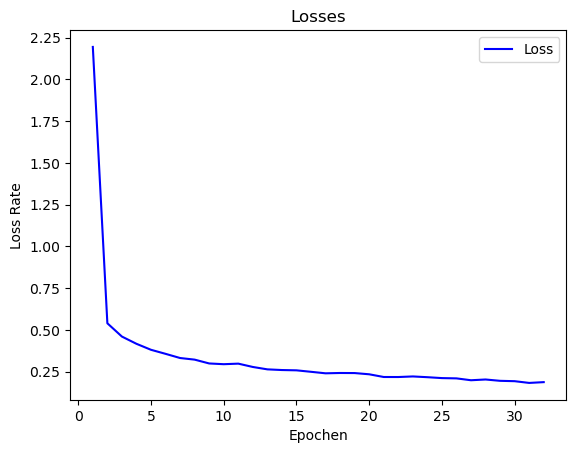

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(1, len(loss) + 1), loss, 'b', label="Loss")
plt.title("Losses")
plt.xlabel("Epochen")
plt.ylabel("Loss Rate")
plt.legend()
plt.show() 

In [13]:
val_acc = model_history.history["val_accuracy"]
val_acc

[0.9083999991416931,
 0.9269999861717224,
 0.9320999979972839,
 0.9315000176429749,
 0.9340999722480774,
 0.9383000135421753,
 0.944599986076355,
 0.9463000297546387,
 0.9473000168800354,
 0.9491000175476074,
 0.944599986076355,
 0.9440000057220459,
 0.9437999725341797,
 0.9445000290870667,
 0.9442999958992004,
 0.9509999752044678,
 0.9455000162124634,
 0.9503999948501587,
 0.9472000002861023,
 0.9523000121116638,
 0.9467999935150146,
 0.9520000219345093,
 0.957099974155426,
 0.9563000202178955,
 0.9527999758720398,
 0.9538999795913696,
 0.9544000029563904,
 0.9552000164985657,
 0.949400007724762,
 0.9557999968528748,
 0.9549000263214111,
 0.9495000243186951]

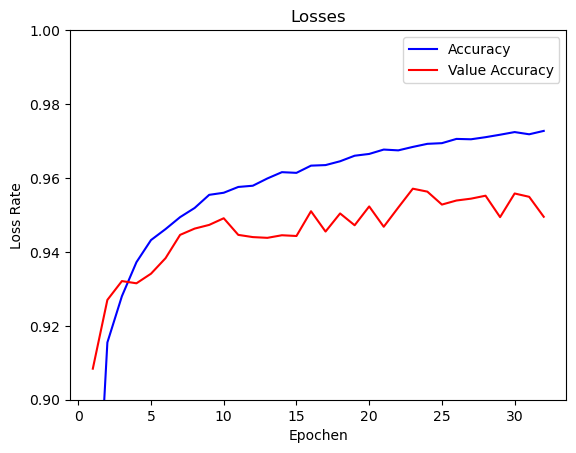

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(1, len(acc) + 1), acc, 'b', label="Accuracy")
plt.plot(np.arange(1, len(val_acc) + 1), val_acc, 'r', label="Value Accuracy")
plt.ylim(0.9,1)

plt.title("Losses")
plt.xlabel("Epochen")
plt.ylabel("Loss Rate")
plt.legend()
plt.show() 

In [6]:
model.save('./model.h5')